In [15]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [18]:
!unzip /content/drive/MyDrive/CNN/Flowers-Dataset.zip

Archive:  /content/drive/MyDrive/CNN/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
flowers_datagen = ImageDataGenerator(rescale= 1./225,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [22]:
flowers_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
a_flowers = flowers_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(256, 256),
                                                class_mode='categorical', batch_size=32)

Found 4317 images belonging to 5 classes.


Creat Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [25]:
model = Sequential()

In [26]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (256,256,3)))

In [27]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(300, activation = "relu"))

In [30]:
model.add(Dense(300, activation = "relu"))

In [31]:
model.add(Dense(5,activation="softmax"))

In [32]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [33]:
len(a_flowers)

135

In [38]:
model.fit(a_flowers, epochs= 3,validation_data=a_flowers, steps_per_epoch=len(a_flowers),validation_steps=len(a_flowers) )

Epoch 1/3
135/135 [==============================] - 445s 3s/step - loss: 0.2515 - accuracy: 0.9217 - val_loss: 0.1387 - val_accuracy: 0.9676
Epoch 2/3
135/135 [==============================] - 484s 4s/step - loss: 0.1279 - accuracy: 0.9646 - val_loss: 0.0699 - val_accuracy: 0.9898
Epoch 3/3
135/135 [==============================] - 438s 3s/step - loss: 0.0746 - accuracy: 0.9847 - val_loss: 0.0444 - val_accuracy: 0.9914


In [41]:
model.save("flowers.h5")

In [ ]:
#Testing the Model

In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [43]:
model = load_model("/content/drive/MyDrive/CNN/flowers.h5")

In [44]:
img = image.load_img("/content/drive/MyDrive/CNN/flowers/rose/26605779860_50872b454a_n.jpg",target_size=(256,256))

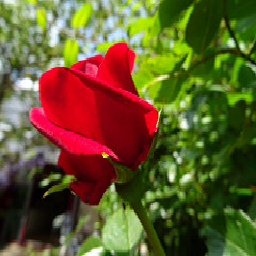

In [45]:
img

In [46]:
x = image.img_to_array(img)

In [47]:
x

array([[[150., 166., 137.],
        [152., 171., 143.],
        [154., 172., 148.],
        ...,
        [ 22.,  55.,   2.],
        [ 21.,  54.,   1.],
        [ 20.,  53.,   0.]],

       [[130., 150., 101.],
        [129., 148., 103.],
        [132., 153., 114.],
        ...,
        [ 24.,  57.,   4.],
        [ 22.,  55.,   2.],
        [ 21.,  54.,   1.]],

       [[130., 150., 101.],
        [129., 148., 103.],
        [132., 153., 114.],
        ...,
        [ 24.,  57.,   4.],
        [ 22.,  55.,   2.],
        [ 21.,  54.,   1.]],

       ...,

       [[149., 138., 106.],
        [155., 144., 112.],
        [162., 151., 119.],
        ...,
        [ 62., 116.,  22.],
        [ 52., 109.,  14.],
        [ 48., 108.,  12.]],

       [[149., 138., 106.],
        [155., 144., 112.],
        [162., 151., 119.],
        ...,
        [ 62., 116.,  22.],
        [ 52., 109.,  14.],
        [ 48., 108.,  12.]],

       [[159., 146., 112.],
        [163., 150., 116.],
        [168., 1

In [48]:
x.ndim

3

In [49]:
x = np.expand_dims(x,axis= 0)

In [50]:
x.ndim

4

In [51]:
pred = model.predict(x)

In [52]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [53]:
hi = ["daisy","dandelion","rose","sunflower","tulip"]

In [54]:
np.argmax(pred)

2

In [55]:
hi[np.argmax(pred)]

'rose'